In [82]:
import re
import json
import seaborn as sns
import arabic_reshaper as a_r
import matplotlib.pyplot as plt
from bidi import algorithm as bidialg

%matplotlib inline

In [70]:
with open('../../data/all_word_freqs_85.json', 'r') as f:
        all_word_freqs = json.load(f)

In [ ]:
f,ax = plt.subplots(1,1,figsize=(20,10))
#plt.figure(figsize=(20,10))
ax.plot(*zip(*word_freqs[0][0][:40]));
labels = [arabic_reshaper.reshape(bidialg.get_display(w_f[0])) for w_f in word_freqs[0][0][:40]]
ax.set_xticklabels(labels, rotation=-45);

In [12]:
type(all_word_freqs)

list

In [71]:
spec_word_dict = {}

In [244]:
def printer(spec_word_dict, word, pattern, max_thres=5, *args, **kwargs):
    wrong = kwargs.get('wrong', re.compile("ااااااااا"))

    for category in range(len(all_word_freqs)):
        for era in range(len(all_word_freqs[category])):
            for w_f in all_word_freqs[category][era]:
                if (pattern.match(w_f[0])) and (not wrong.match(w_f[0])) and (w_f[1] < max_thres):
                    print('C: {} - E: {} - W: {} - F: {}'.format(category,era,w_f[0],w_f[1]))
                    break

In [208]:
def tf_time_of_word(spec_word_dict, word, pattern, max_thres=5, *args, **kwargs):
    spec_word_dict[word] = {}
    wrong = kwargs.get('wrong', re.compile("ااااااااا"))

    for category in range(len(all_word_freqs)):
        spec_word_dict[word][category] = {}
        for era in range(len(all_word_freqs[category])):
            for w_f in all_word_freqs[category][era]:
                if (pattern.match(w_f[0])) and (not wrong.match(w_f[0])) and (w_f[1] < max_thres):
                    spec_word_dict[word][category][era] = w_f[1]
                    break

In [ ]:
#tf_time_of_word(spec_word_dict, 'حديث', re.compile("[ال]*[ل]*حد[ي]*ث"), re.compile("للحدث"), 1.75)
#tf_time_of_word(spec_word_dict, 'قياس', re.compile("[فال]*[م]*قي[ا]*س"), re.compile("ااااااااا"), 100)
#tf_time_of_word(spec_word_dict, 'حنيفة', re.compile("[أ]*حن[ا]*[ي]*ف[ة]*"), re.compile("ااااااااا"), 5)

C: 0 - E: 0 - W: حنفة - F: 0.021946090406570563
C: 0 - E: 1 - W: حنيفه - F: 0.01066196164112116
C: 0 - E: 2 - W: حنيف - F: 0.0044363849293506084
C: 0 - E: 3 - W: حنيفا - F: 0.014861150711850693
C: 0 - E: 4 - W: حنفي - F: 0.013391958327567531
C: 0 - E: 5 - W: حنفي - F: 0.002004531703732629
C: 1 - E: 0 - W: حنيف - F: 0.0007307492117699168
C: 1 - E: 1 - W: حنيفة - F: 1.3688997546988386
C: 1 - E: 2 - W: حنيف - F: 0.014266084309913744
C: 1 - E: 3 - W: حنيفا - F: 0.01126796957673249
C: 1 - E: 4 - W: حنيفة - F: 0.15590717098793952
C: 1 - E: 5 - W: حنيفة - F: 0.07108890330096111
C: 2 - E: 0 - W: حنيف - F: 0.013812154696128709
C: 2 - E: 1 - W: حنيفا - F: 0.015488618053586546
C: 2 - E: 2 - W: حنيفة - F: 3.0862314826348176
C: 2 - E: 3 - W: حنيفة - F: 0.26259283356648594
C: 2 - E: 4 - W: حنفي - F: 0.038169080892597865
C: 2 - E: 5 - W: حنفيا - F: 0.021228832077140013
C: 3 - E: 0 - W: حنيفة - F: 0.03298111901552281
C: 3 - E: 1 - W: حنيفة - F: 0.11695072891142098
C: 3 - E: 2 - W: حنيفة - F: 1.0653059

In [46]:
current_palette = sns.color_palette()

category_graphs = {
    134: ['Ḥanafī', current_palette[0]],
    135: ['Mālikī', current_palette[1]],
    136: ['Shāfiʿī', current_palette[2]],
    137: ['Ḥanbalī', current_palette[3]],
}

In [146]:
def plot_freq_time(word):
    f,ax = plt.subplots(figsize=(20,10))
    for i,category in enumerate(category_graphs):
        ax.plot(list(spec_word_dict[word][i].values()),label=category_graphs[category][0],color=category_graphs[category][1],
                linewidth = 5, linestyle = '-', alpha=.7)

    ax.legend(fontsize=15)
    ax.set_xlabel("Lunar Year", fontsize=19);
    ax.set_ylabel("Word Frequency", fontsize=19);
    ax.set_xticklabels([0,200,500,700,900,1250,1500], fontsize=15);
    [tick.label.set_fontsize(15) for tick in ax.yaxis.get_major_ticks()]
    ax.set_title("Use of the word '{}'".format((bidialg.get_display(word))), fontsize=25);

In [74]:
wrong

C: 0 - E: 0 - W: حدثني - F: 0.05172260046782935
C: 0 - E: 1 - W: حدثنا - F: 0.5085016307909201
C: 0 - E: 2 - W: الحديث - F: 0.623384086028264
C: 0 - E: 3 - W: لحديث - F: 0.12389601051460188
C: 0 - E: 4 - W: حديث - F: 0.2571879051766028
C: 0 - E: 5 - W: الحديث - F: 0.05827708190940536
C: 1 - E: 0 - W: حدثه - F: 0.017172606476593043
C: 1 - E: 1 - W: حدثنا - F: 0.4450542922394161
C: 1 - E: 2 - W: الحديثين - F: 0.07907291318034947
C: 1 - E: 3 - W: حديثا - F: 0.02456545220798308
C: 1 - E: 4 - W: لحديث - F: 0.07225082303745047
C: 1 - E: 5 - W: الحدث - F: 0.2221035360397952
C: 2 - E: 0 - W: حديثها - F: 0.015193370165741578
C: 2 - E: 1 - W: لحديث - F: 0.08127805384477323
C: 2 - E: 2 - W: لحديث - F: 0.08580733544161825
C: 2 - E: 3 - W: الحديث - F: 0.5371535045228784
C: 2 - E: 4 - W: لحديث - F: 0.19884127210027205
C: 2 - E: 5 - W: حدثه - F: 0.07979604860847524
C: 3 - E: 0 - W: حدثهم - F: 0.31607962203760687
C: 3 - E: 1 - W: حدثهم - F: 0.48855683687157075
C: 3 - E: 2 - W: حدثنا - F: 0.24519890158

# Words related to *Narration*

In [ ]:
f,ax = plt.subplots(1,1,figsize=(20,10))
#plt.figure(figsize=(20,10))
ax.plot(*zip(*word_freqs[0][0][:40]));
labels = [arabic_reshaper.reshape(bidialg.get_display(w_f[0])) for w_f in word_freqs[0][0][:40]]
ax.set_xticklabels(labels, rotation=-45);

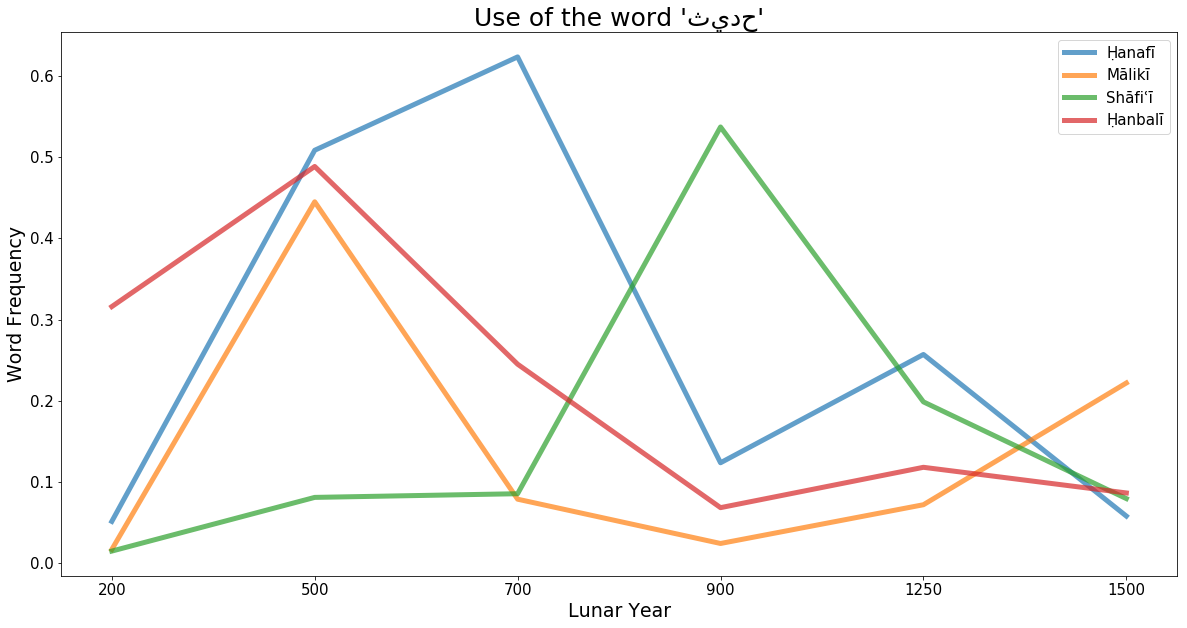

In [186]:
tf_time_of_word(spec_word_dict, 'حديث', re.compile("[ال]*[ل]*حد[ي]*ث"), max_thres=1.75, wrong=re.compile("للحدث"))
plot_freq_time('حديث')

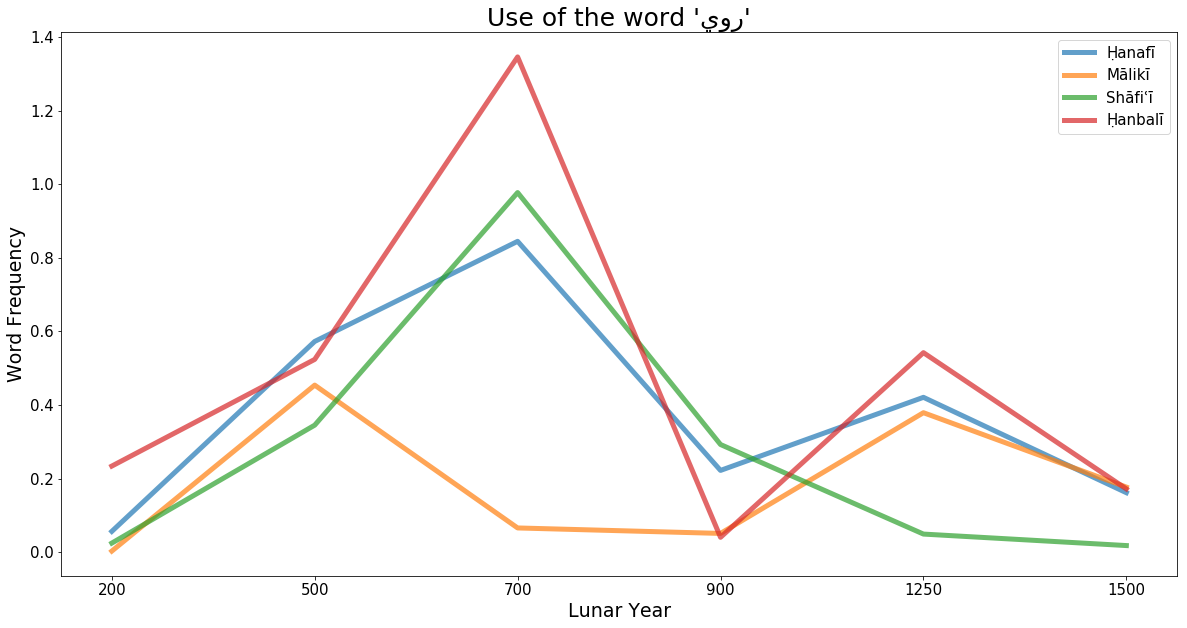

In [233]:
tf_time_of_word(spec_word_dict, word='روي', pattern=re.compile("رو[ا]*[يى][ة]*"))
plot_freq_time('روي')

# Words related to the *Authors*

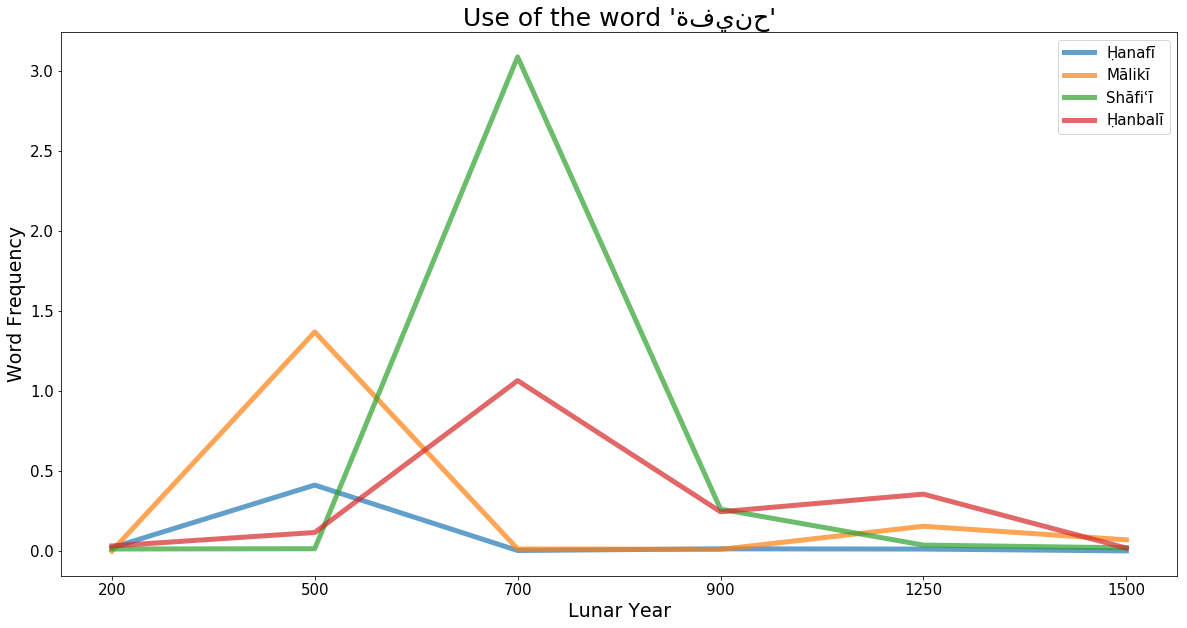

In [209]:
tf_time_of_word(spec_word_dict, word='حنيفة', pattern=re.compile("[أبو]*حن[ا]*[ي]*ف[ي]*[ة]*"))
plot_freq_time('حنيفة')

### Here we see other groups commenting a lot on the Ḥanafī's so let's see a more 'tame' version

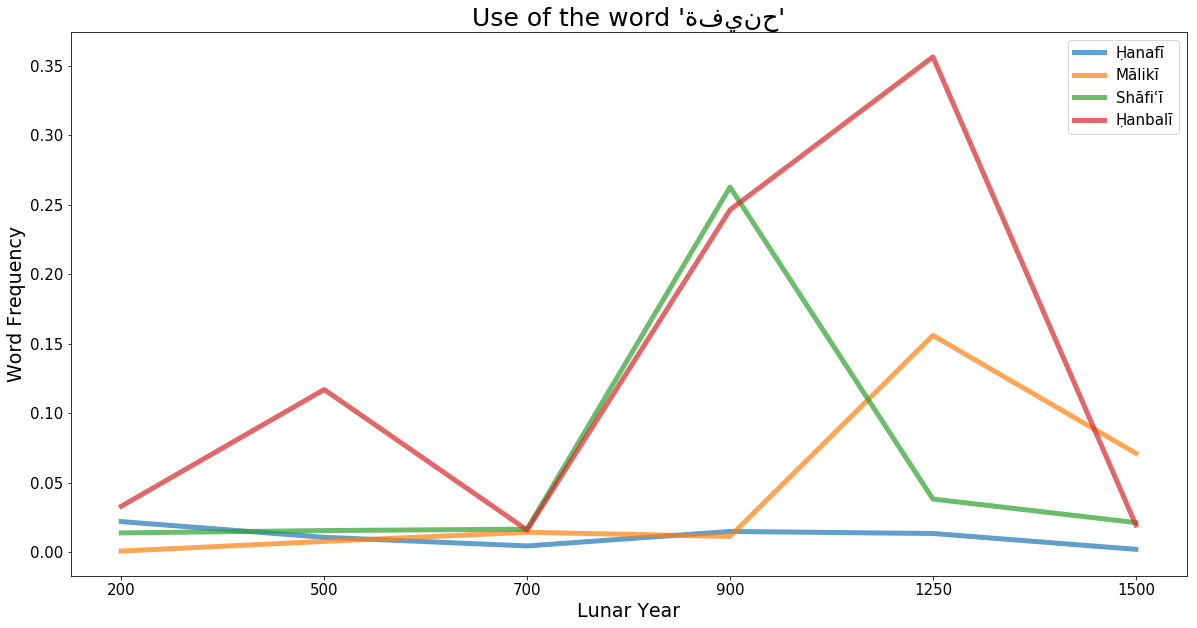

In [225]:
tf_time_of_word(spec_word_dict, 'حنيفة', re.compile("[أ]*حن[ا]*[ي]*ف[ة]*"),max_thres=1)
plot_freq_time('حنيفة')

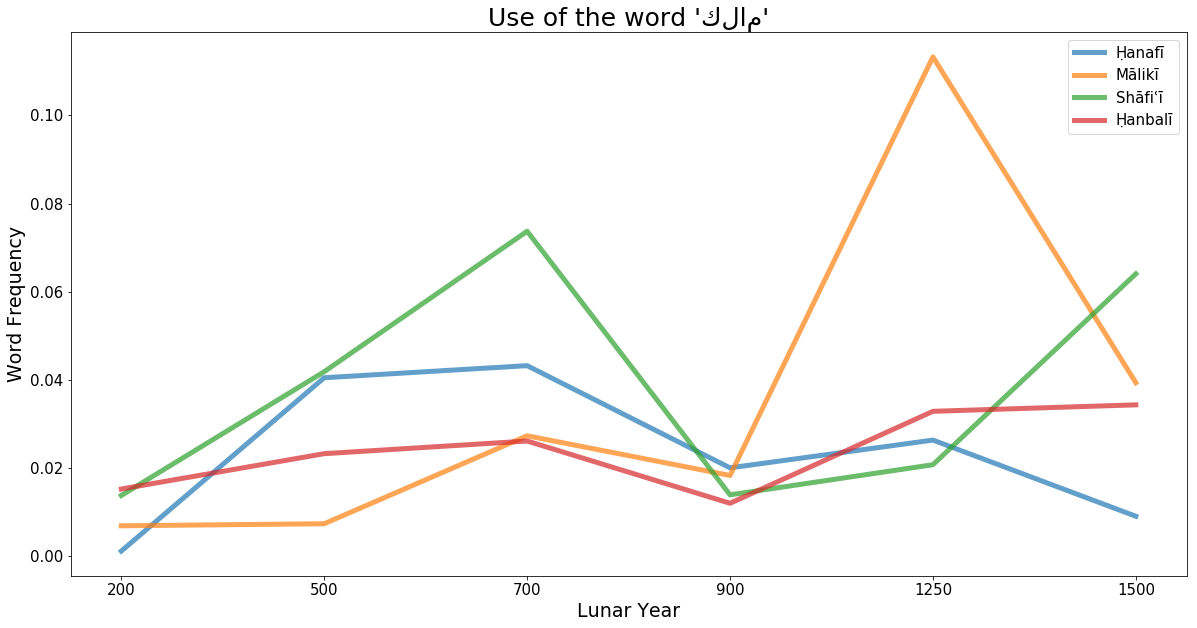

In [262]:
tf_time_of_word(spec_word_dict, word='مالك', pattern=re.compile("مالك[يا]*[^هموة]"))
plot_freq_time('مالك')

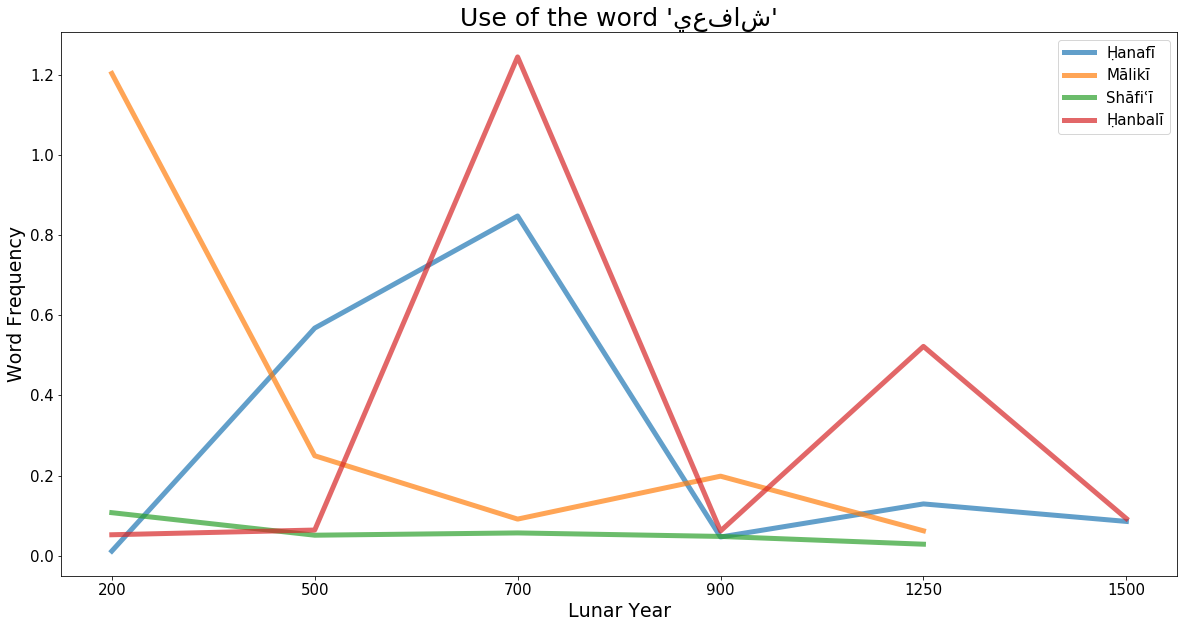

In [265]:
tf_time_of_word(spec_word_dict, word='شافعي', pattern=re.compile("[ال]*شافعي[ة]*"))
plot_freq_time('شافعي')

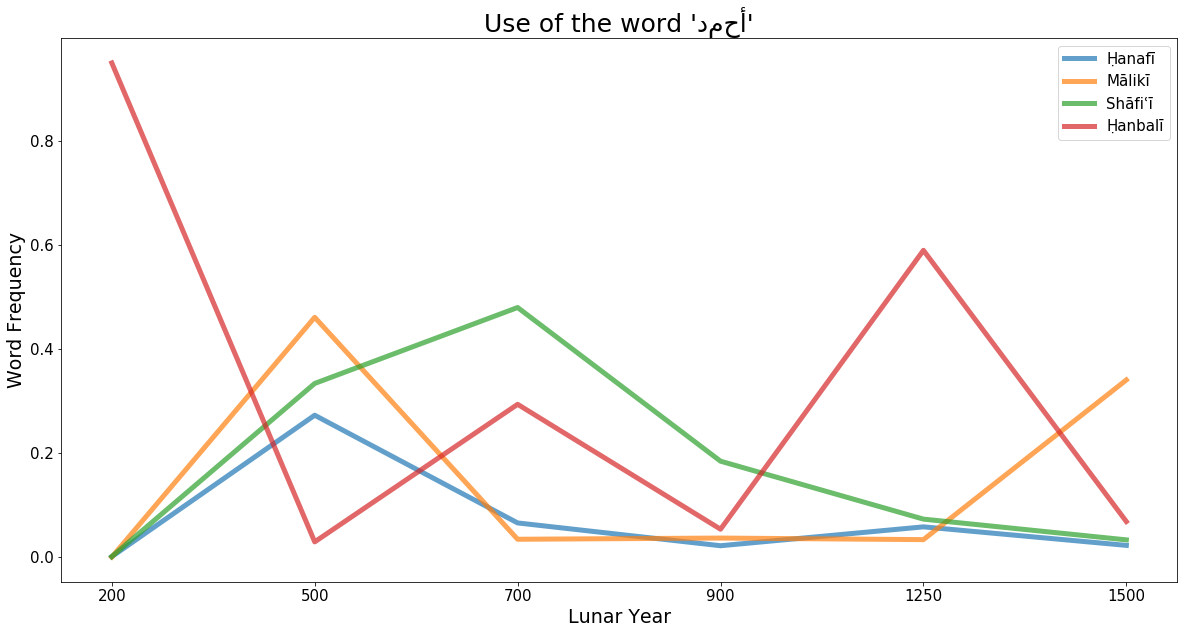

In [268]:
tf_time_of_word(spec_word_dict, word='أحمد', pattern=re.compile("[ول]*[اأ]حمد"))
plot_freq_time('أحمد')

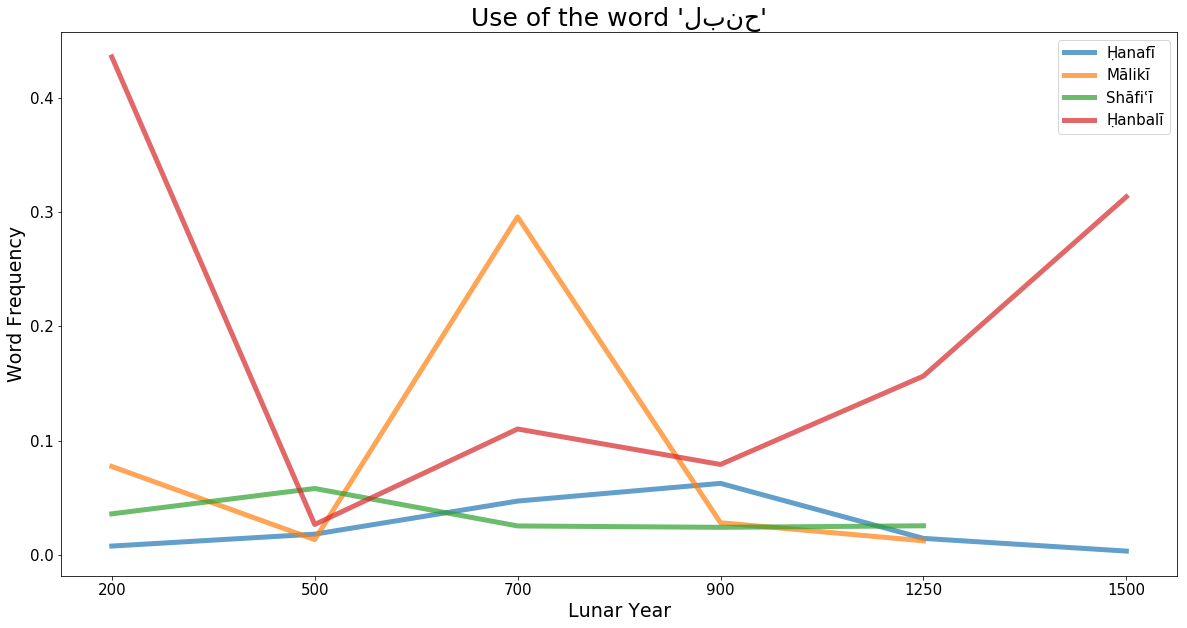

In [271]:
tf_time_of_word(spec_word_dict, word='حنبل', pattern=re.compile("[ال]*حن[ا]*بل[ة]*"))
plot_freq_time('حنبل')

# Words related to *legal terms*

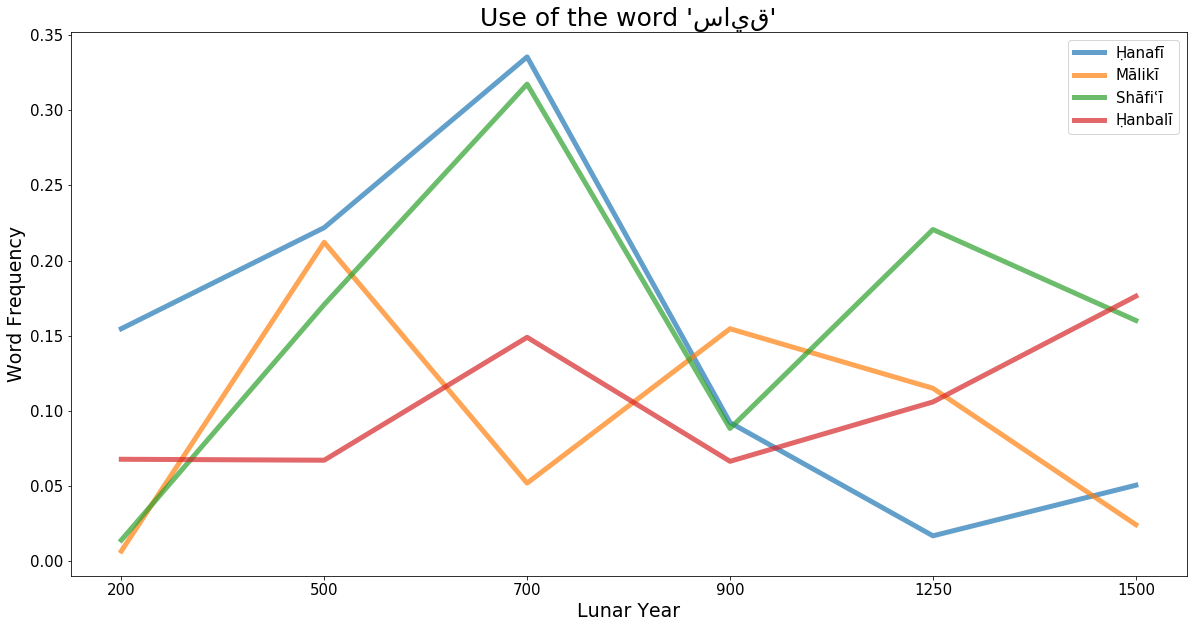

In [189]:
tf_time_of_word(spec_word_dict, 'قياس', re.compile("[فال]*[م]*قي[ا]*س"), max_thres=1.75)
plot_freq_time('قياس')

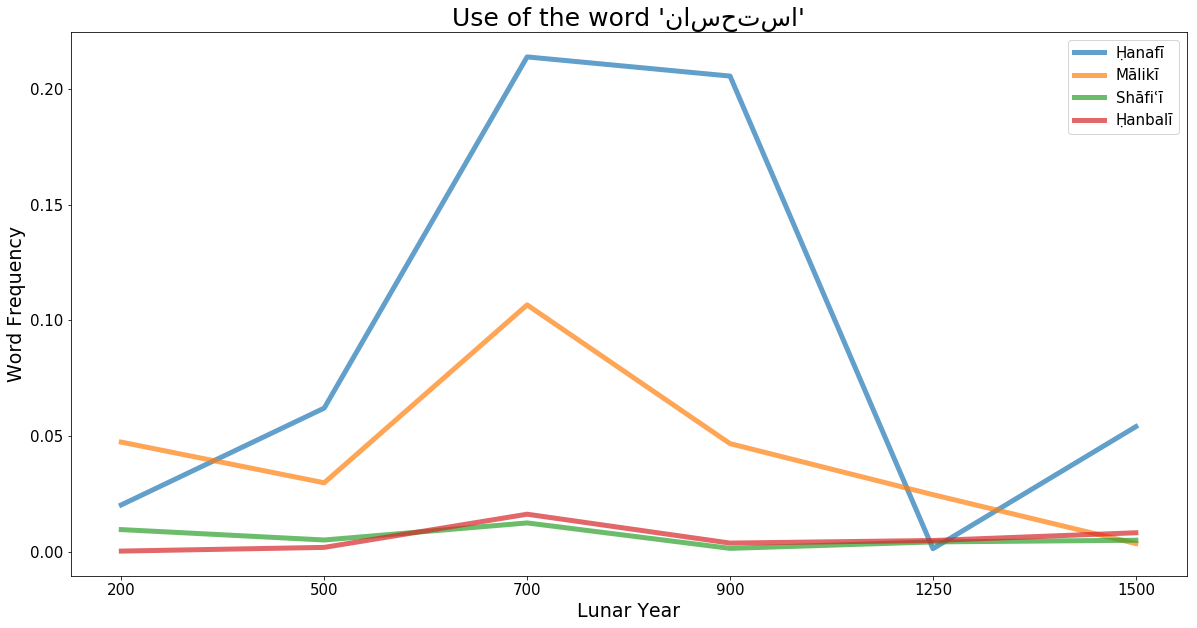

In [237]:
tf_time_of_word(spec_word_dict, word='استحسان', pattern=re.compile("[ال]*استحسان"))
plot_freq_time('استحسان')

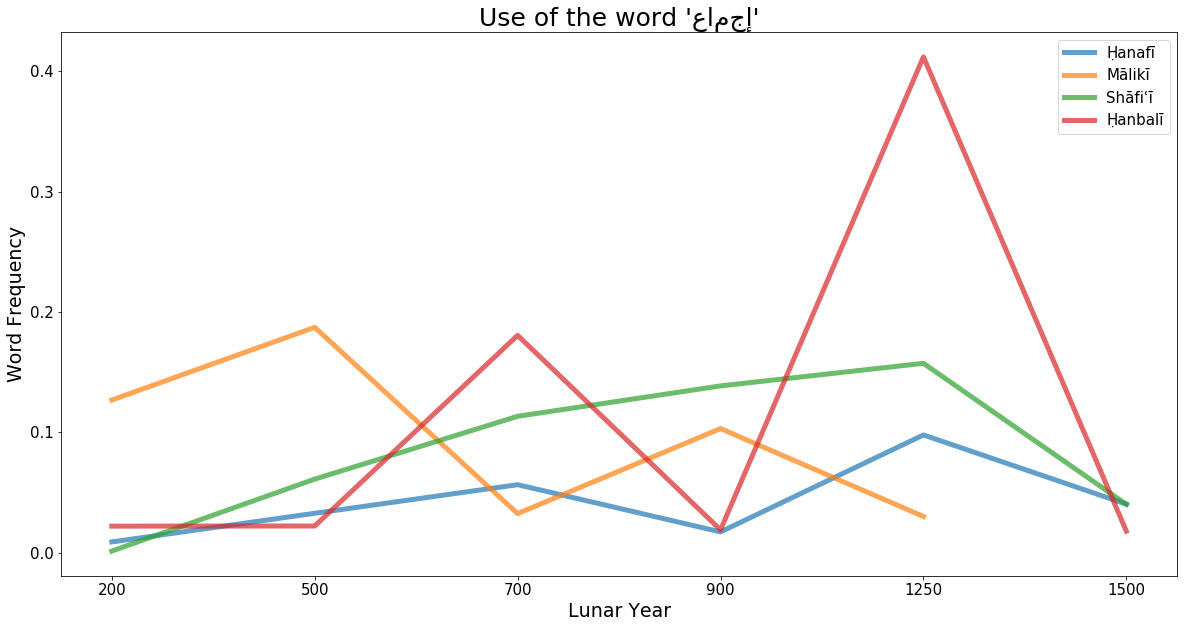

In [239]:
tf_time_of_word(spec_word_dict, word='إجماع', pattern=re.compile("[ال]*[اإ]جماع"))
plot_freq_time('إجماع')

# ًWords related to *Narrators*

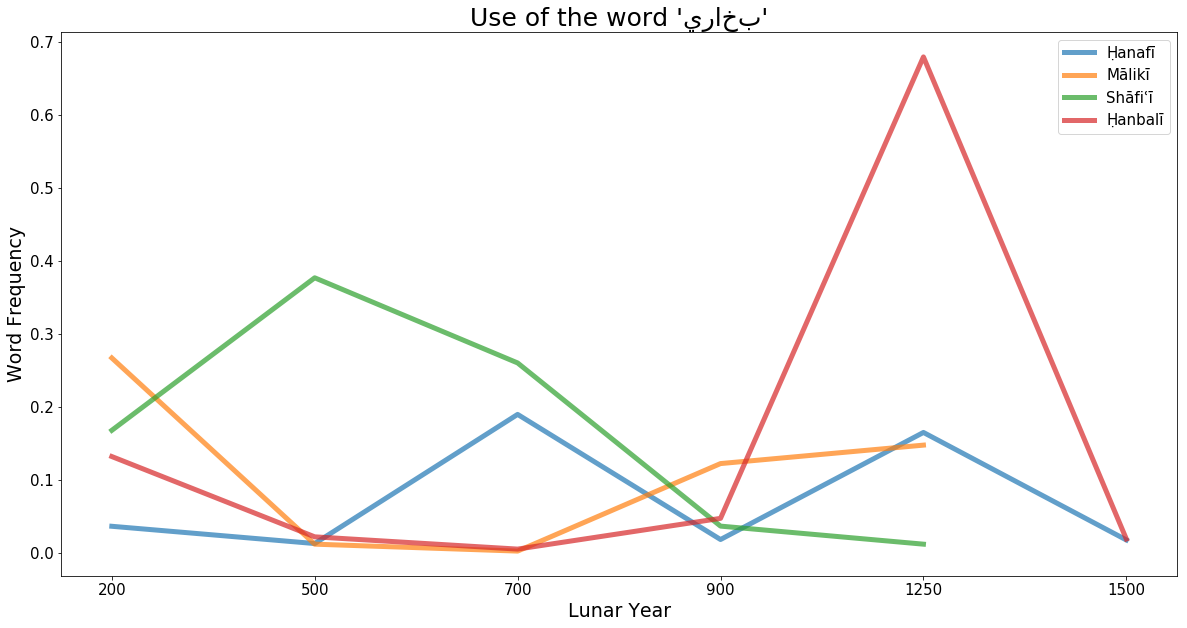

In [273]:
tf_time_of_word(spec_word_dict, word='بخاري', pattern=re.compile("[ال]*بخاري"))
plot_freq_time('بخاري')

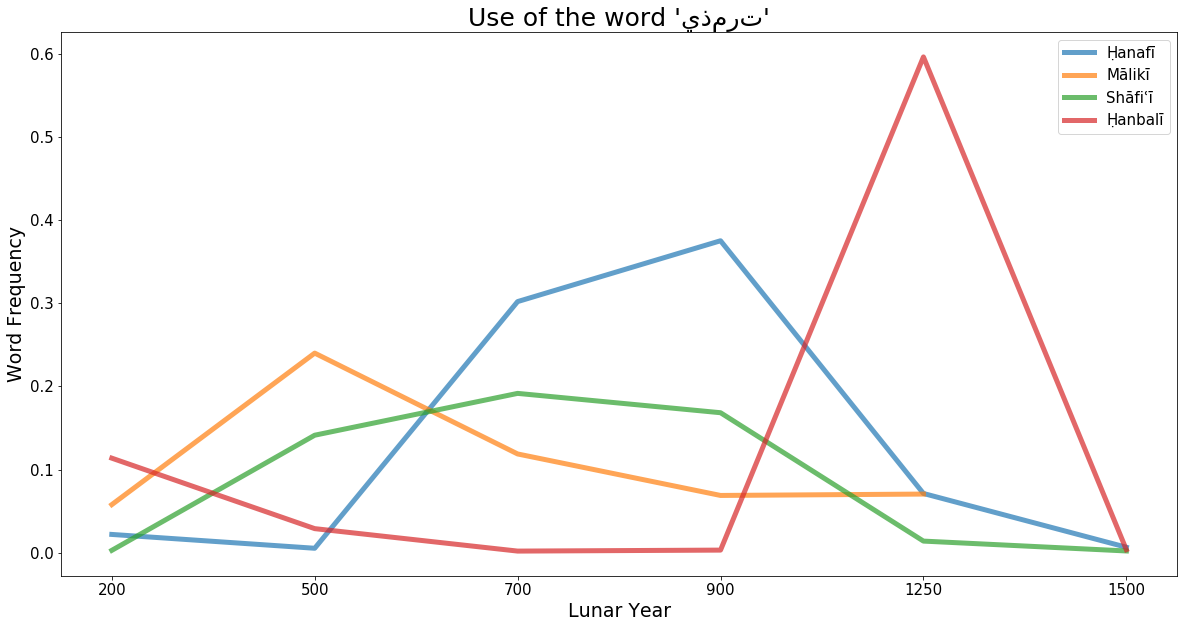

In [275]:
tf_time_of_word(spec_word_dict, word='ترمذي', pattern=re.compile("[ال]*ترمذي"))
plot_freq_time('ترمذي')

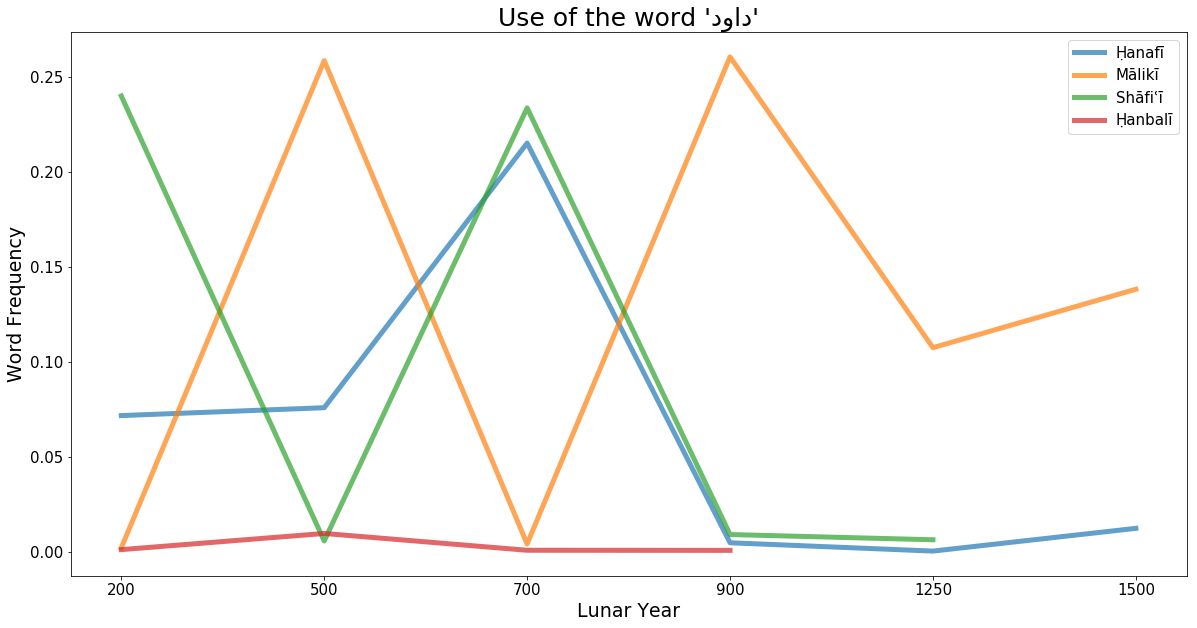

In [279]:
tf_time_of_word(spec_word_dict, word='داود', pattern=re.compile("دا[و]د"), max_thres=1)
plot_freq_time('داود')

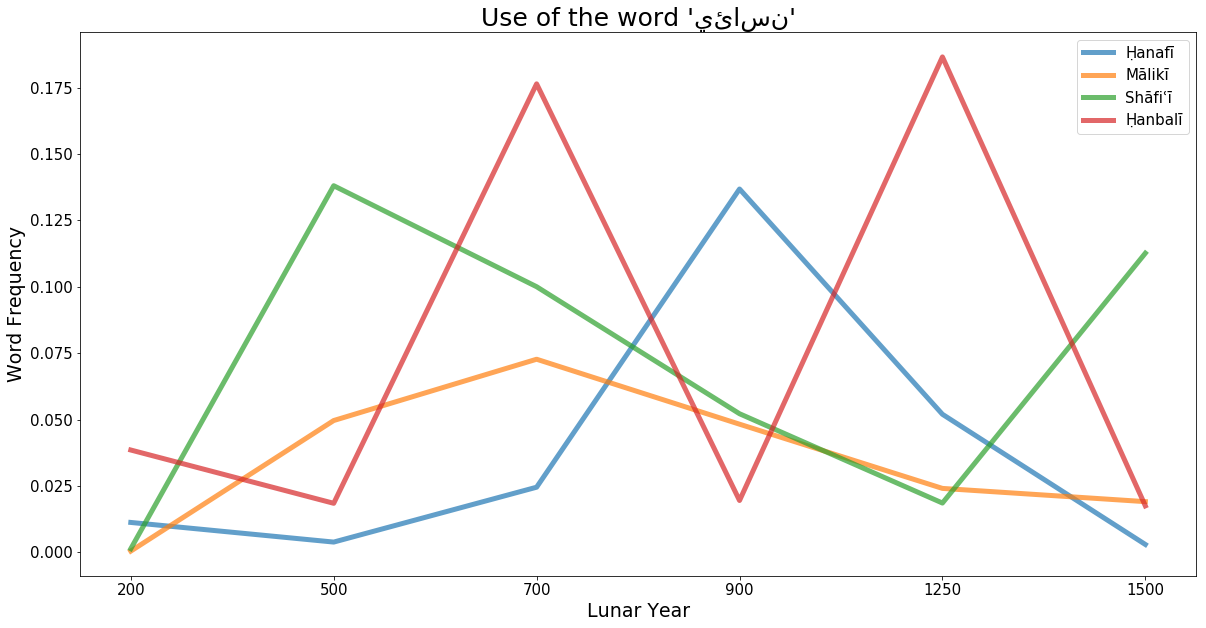

In [280]:
tf_time_of_word(spec_word_dict, word='نسائي', pattern=re.compile("[ال]*نسائي"))
plot_freq_time('نسائي')

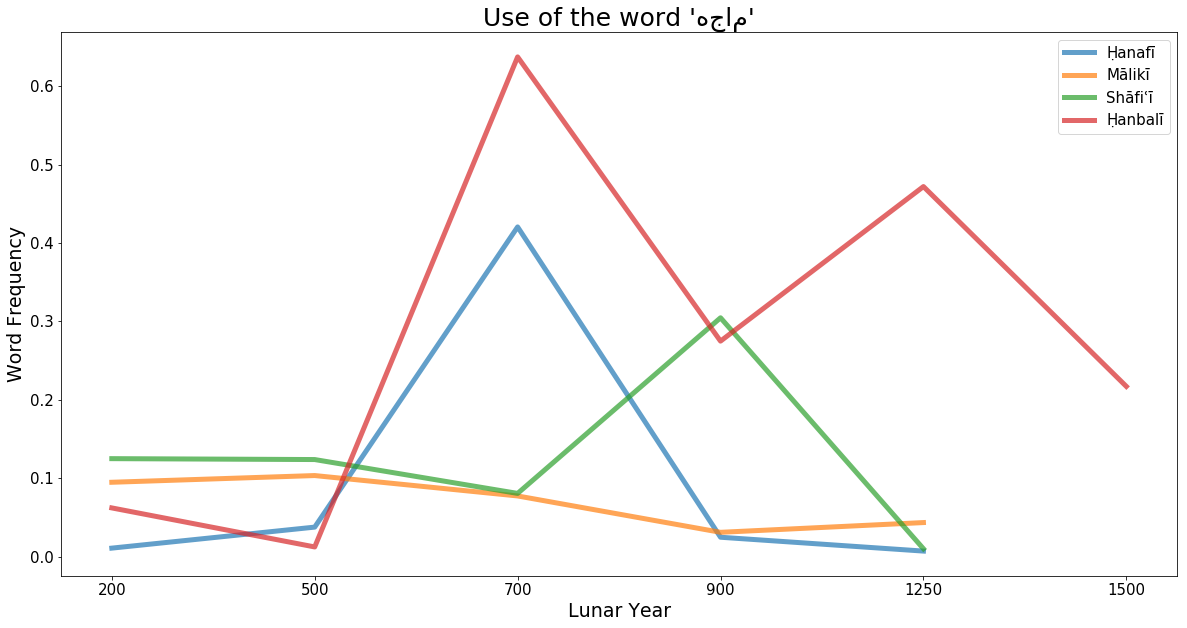

In [285]:
tf_time_of_word(spec_word_dict, word='ماجه', pattern=re.compile("[ن]*ماج[هة]"))
plot_freq_time('ماجه')

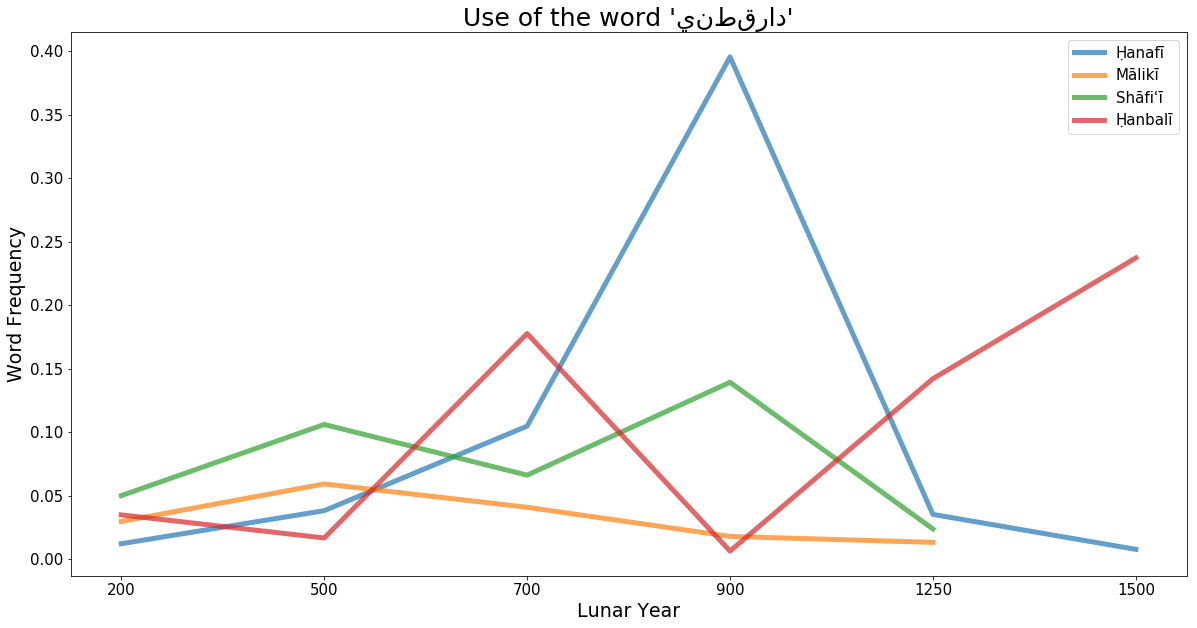

In [292]:
tf_time_of_word(spec_word_dict, word='دارقطني', pattern=re.compile("[ال]*دارقطني"))
plot_freq_time('دارقطني')

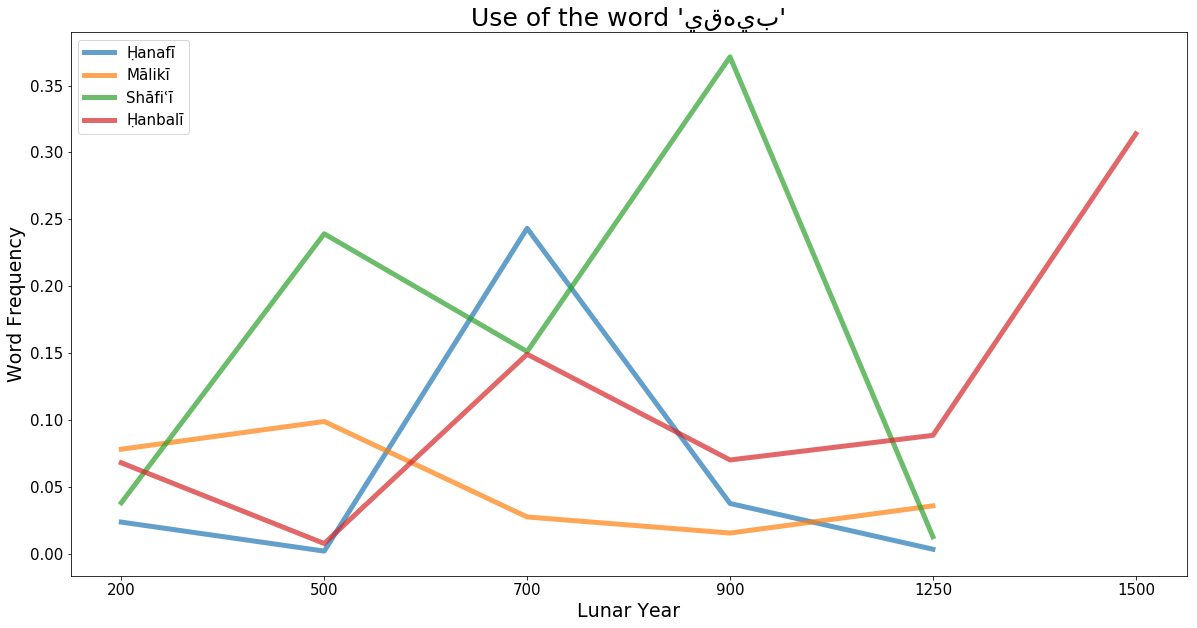

In [294]:
tf_time_of_word(spec_word_dict, word='بيهقي', pattern=re.compile("[ال]*بيهقي"))
plot_freq_time('بيهقي')

In [302]:
printer(spec_word_dict, word='حزم', pattern=re.compile("[ن]*حزم"))

C: 0 - E: 0 - W: حزمة - F: 0.012270560612990677
C: 0 - E: 1 - W: حزم - F: 0.011963511574154253
C: 0 - E: 2 - W: حزم - F: 0.0199282047072286
C: 0 - E: 3 - W: حزم - F: 0.08210085029323493
C: 0 - E: 4 - W: حزم - F: 0.007588100731143052
C: 0 - E: 5 - W: حزما - F: 0.00175052963542442
C: 1 - E: 0 - W: حزم - F: 0.0035319545235545976
C: 1 - E: 1 - W: حزم - F: 0.0655642445769542
C: 1 - E: 2 - W: حزم - F: 0.10458689220162659
C: 1 - E: 3 - W: حزم - F: 0.020929310253642707
C: 1 - E: 4 - W: حزم - F: 0.01364478120295452
C: 1 - E: 5 - W: حزم - F: 0.017455270966062354
C: 2 - E: 0 - W: حزما - F: 0.006906077348064354
C: 2 - E: 1 - W: حزم - F: 0.030234728011841752
C: 2 - E: 2 - W: حزم - F: 0.06554818243915081
C: 2 - E: 3 - W: حزم - F: 0.03396230154310906
C: 2 - E: 4 - W: حزم - F: 0.07487432253281473
C: 2 - E: 5 - W: حزم - F: 0.05469474841304889
C: 3 - E: 0 - W: حزم - F: 0.04490193231284801
C: 3 - E: 1 - W: حزم - F: 0.11641813011266892
C: 3 - E: 2 - W: حزم - F: 0.060914810959401613
C: 3 - E: 3 - W: حزم - 

In [289]:
all_word_freqs[0][3][:50]

[['العناية', 1.0413497424041183],
 ['البناية', 0.9133303330824928],
 ['حاشية', 0.8117808499065258],
 ['أتقاني', 0.5765170273934429],
 ['الوصية', 0.5683380828652203],
 ['الجامع', 0.4648713271762172],
 ['لأب', 0.4581124563336177],
 ['الشلبي', 0.44258727822738897],
 ['مرفوعا', 0.4273651594409909],
 ['ماجة', 0.4205645094475367],
 ['الموكل', 0.40299566943733406],
 ['الزيلعي', 0.4007569647971089],
 ['الدارقطني', 0.3955763028098759],
 ['الترمذي', 0.3751523038225762],
 ['المصر', 0.36734000587848936],
 ['الكافي', 0.3621124184881527],
 ['المحيط', 0.3501246751946073],
 ['فالقول', 0.3464347177321683],
 ['الخجندي', 0.31700641071349783],
 ['الذخيرة', 0.31644031561348007],
 ['السروجي', 0.3112394528528567],
 ['القدوري', 0.30911065725809267],
 ['الأتقاني', 0.30791854705006927],
 ['التبيين', 0.30099702770300146],
 ['الطواف', 0.28600758641735224],
 ['بالبيع', 0.27417204596585165],
 ['طواف', 0.27393665488827135],
 ['البرهان', 0.2729189029181212],
 ['المتن', 0.2706722518922089],
 ['والنسائي', 0.26252180361